In [15]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import os
from tensorflow import keras
from tensorflow.keras import layers, optimizers, datasets, Sequential

In [16]:
(x_train, y_train), (x_test, y_test) = datasets.mnist.load_data()

In [17]:
x_train.shape

(60000, 28, 28)

(-0.5, 27.5, 27.5, -0.5)

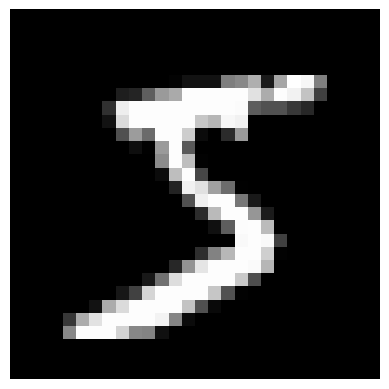

In [18]:
plt.imshow(x_train[0],cmap="gray")
plt.axis("off")

In [19]:
print(y_train[0])
print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

5
(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


In [20]:
num_classes = 10

y_train_hot = keras.utils.to_categorical(y_train,num_classes)
y_test_hot = keras.utils.to_categorical(y_test,num_classes)


In [21]:
x_train_hot = x_train.astype('float32')/255
x_test_hot = x_test.astype('float32')/255


In [24]:
model = Sequential()
model.add(layers.Conv2D(6,(3,3),strides=(1,1),padding='same',activation='relu',input_shape=(28,28,1)))
model.add(layers.MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model.add(layers.Flatten())

model.add(layers.Dense(100,activation='relu'))
model.add(layers.Dense(10,activation='softmax'))

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)                    │ (None, 28, 28, 6)           │              60 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 14, 14, 6)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 1176)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 100)                 │         117,700 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 118,770 (463.95 KB)

 Trainable params: 118,770 (463.95 KB)

 Non-trainable params: 0 (0.00 B)

In [30]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

history = model.fit(x_train_hot,y_train_hot,batch_size=128,epochs=10,validation_data=(x_test_hot,y_test_hot))

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 22s 43ms/step - accuracy: 0.8358 - loss: 0.6326 - val_accuracy: 0.9498 - val_loss: 0.1696
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 38s 37ms/step - accuracy: 0.9523 - loss: 0.1625 - val_accuracy: 0.9655 - val_loss: 0.1120
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 19s 40ms/step - accuracy: 0.9697 - loss: 0.1051 - val_accuracy: 0.9738 - val_loss: 0.0879
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 18s 38ms/step - accuracy: 0.9769 - loss: 0.0778 - val_accuracy: 0.9781 - val_loss: 0.0676
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 17s 37ms/step - accuracy: 0.9816 - loss: 0.0624 - val_accuracy: 0.9787 - val_loss: 0.0617
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 22s 40ms/step - accuracy: 0.9845 - loss: 0.0512 - val_accuracy: 0.9815 - val_loss: 0.0534
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 19s 37ms/step - accuracy: 0.9875 - loss: 0.0430 - val_accuracy: 0.9807 - val_loss: 0.0562
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 17s 37ms/step - accuracy: 0.9894 - loss: 0.0354 - 

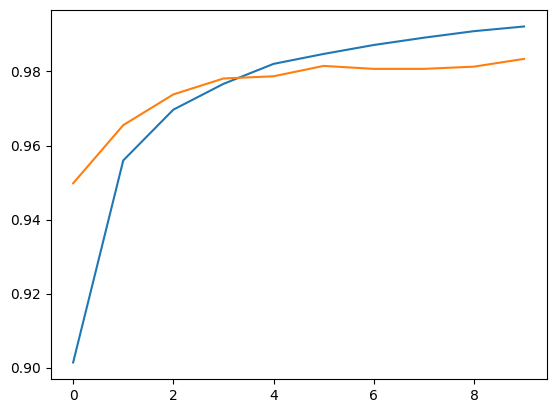

In [31]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

In [32]:
history = model.evaluate(x_test_hot,y_test_hot)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.9791 - loss: 0.0639
